<a href="https://colab.research.google.com/github/vamsipvk2203/NLP-Assgn-5/blob/main/Insult_detection(NLP_Case_Study).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title:
### Detecting Insults in Social Commentary

## Group Members:
* P.Vamsi Krishna - AM.EN.U4CSE17152
* P.V.S Sri Alavandar - AM.EN.U4CSE17150
* T.Pramodh - AM.EN.U4CSE17339
* P.V V Sai Akhilesh - AM.EN.U4CSE17250

Alavandar


### Problem Definition:

The challenge is to detect if a comment from an online conversation (Comment section) can be considered insulting to another participant in the conversation. The idea is to create a generalizable binary classifier which could operate in accurately classifying the new comments int their respective labels. In this project, We have built a system, that can detect, whether or not, any given comment is insulting, by building a machine learning system.

This project also tests the dataset with different classifier models, both **Linear & Non-Linear** and decide which might be the best classifier for this purpose.


Dataset: https://www.kaggle.com/c/detecting-insults-in-social-commentary




In [ ]:
!unzip detecting-insults-in-social-commentary.zip

Archive:  detecting-insults-in-social-commentary.zip
  inflating: impermium_verification_labels.csv  
  inflating: impermium_verification_set.csv  
  inflating: sample_submission_null.csv  
  inflating: test.csv                
  inflating: test_with_solutions.csv  
  inflating: train.csv               


In [ ]:
!pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import sklearn
# to split data
from sklearn.model_selection import train_test_split, ShuffleSplit
import sklearn.feature_extraction.text as text

# Methodology

## I. Importing the data

Data for training and testing is obtained from Kaggle. The data set contains 3947 examples, each of which consists of the text of a particular post and its desired label. A label of 1 represents an insulting post, while a label of 0 represents a non-insulting post. 

For Example, 

**Text:** “You’re a moron, truth is beyond your reach”, Label: 1

**Text:** “I’ll take that temp…I really hate the heat”, Label: 0


### Loading and preparing the data

In [ ]:
# Open the training file with pandas.
df = pd.read_csv("train.csv")

In [ ]:
# Inspect complete dataset
df.head(5)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [ ]:
# getting the shape of dataframe
df.shape

(3947, 3)

In [ ]:
# Getting the Count of Positive and Negative
df[['Comment','Insult']].groupby('Insult').count()

,Comment
Insult,
0,2898
1,1049


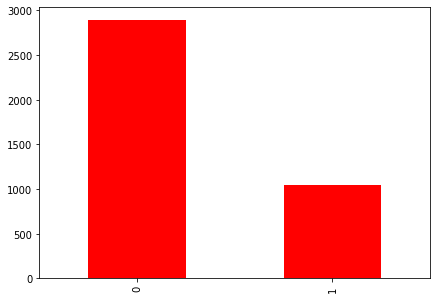

In [ ]:
import matplotlib.pyplot as plt
df['Insult'].value_counts().plot.bar(color = 'red', figsize=(7,5))

In total, **1049** of the examples are labelled as **“insulting”**, while the remaining **2898** examples are labelled as **“not insulting”**.

In [ ]:
# Inspect data
df[['Insult', 'Comment']].tail(5)

,Insult,Comment
3942,1,"""you are both morons and that is never happening"""
3943,0,"""Many toolbars include spell check, like Yahoo..."
3944,0,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,"""How about Felix? He is sure turning into one ..."
3946,0,"""You're all upset, defending this hipster band..."


In [ ]:
#Code for checking 10 Not-insulting Comments

df[df['Insult'] == 0].head(10)

,Insult,Date,Comment
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
10,0,20120620015140Z,"""@jdstorm dont wish him injury but it happened..."
11,0,20120530044519Z,"""Be careful,Jimbo.OG has a fork with your name..."
12,0,NaN,"""@tonnyb Or they just don't pay attention """
13,0,NaN,"""Hmmm. Perhaps some who are too pig-faced to g..."


In [ ]:
#Code for checking 10 Insulting Comments

df[df['Insult'] == 1].head(10)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."
15,1,20120611090207Z,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."
16,1,20120320162532Z,"""You with the 'racist' screen name\n\nYou are ..."
18,1,20120320075347Z,"""your such a dickhead..."""
19,1,20120320203947Z,"""Your a retard go post your head up your #%&*"""
34,1,20120515132156Z,"""Allinit123, your\xa0hypocrisy\xa0is sickening..."
37,1,20120620161958Z,"""I can't believe the stupid people on this sit..."


In [ ]:
# splitting Labels and comments
label, comments = df['Insult'],df['Comment']

In [ ]:
# checking label, comments
type(label), type(comments)

(pandas.core.series.Series, pandas.core.series.Series)

## II. Data Wrangling

Once the data has been loaded, data wrangling pipeline is being created to clean data and remove garbage characters. 

1. Text Cleansing.
2. Tokenization
3. Stemming
4. Lemmatization
5. Stop words removal


####  Text Cleaning: To Lower Case

In [ ]:
# converting data to lowercase
comments=comments.str.lower()

In [ ]:
comments.iloc[5]

'"@sdl ok, but i would hope they\'d sign him to a one-year contract to start with. give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits."'

In [ ]:
# for tokenizing sentences
from nltk import sent_tokenize

# for word tokenizing
from nltk import word_tokenize


#### Text Cleaning: Removing special characters

In [ ]:
# regular expressions to remove punctuations
import re
from re import sub
import string

def remove_special_char(x):
    # this will replace all punctuations with spaces
    punc = string.punctuation
    pat= r"[{}]".format(punc)
    x=re.sub(pat, " ", x)
    
    # this will replace all digits with None
    x=re.sub(pattern=r"\d", repl=r" ", string=x)
    
    # this will print the root words through lemmatization
    return " ".join( i for i in lemmatize(x))

Vamsi

#### Stemming and Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Lemmatization using Wordnet Lemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer
#Stemming using Porter stemmer
from nltk.stem import PorterStemmer 

def lemmatize(x):
    st = WordNetLemmatizer()
    words=x.strip().split()
    
    return [st.lemmatize(x) for x in words]

In [ ]:
#making a copy of transformed 
comments_tran = comments.apply(remove_special_char)

In [ ]:
# checking the change
comments.iloc[5], comments_tran.iloc[5]

('"@sdl ok, but i would hope they\'d sign him to a one-year contract to start with. give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits."',
 "sdl ok but i would hope they'd sign him to a one-year contract to start with give him the chance to be reliable and productive but give themselves the out if all his time off ha hurt his playing skill or if he fall back into old habit")

#### Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
# getting stopwords for classifier
stopWords = set(stopwords.words('english'))
type(stopWords), len(stopWords)

(set, 179)

#### Tokenization

In [ ]:
tf = text.TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 1))
X = tf.fit_transform(comments_tran)
print(X.shape)

(3947, 13952)


In [ ]:
# checking the sparsity of matrix
print("Each sample has ~{0:.2%} non-zero features.".format(X.nnz / float(X.shape[0] * X.shape[1])))

Each sample has ~0.11% non-zero features.


In [ ]:
# Storing words in vocab list
vocab=list((tf.vocabulary_).keys())
len(vocab)

13952

In [ ]:
vocab.sort()
print(vocab[:50])

['aaaaaaaaa', 'aaaah', 'aaahhh', 'aac', 'aamir', 'aap', 'aarongmy', 'ab', 'abacha', 'abandon', 'abc', 'abe', 'abel', 'aberdeen', 'abet', 'abid', 'abigail', 'abil', 'ability', 'abit', 'abl', 'abnorm', 'abolish', 'abolit', 'abomin', 'abort', 'abortifaci', 'abortion', 'abov', 'abraham', 'abroad', 'abrupt', 'abscam', 'absenc', 'absolut', 'absolutejok', 'absolutely', 'abstain', 'abstractfirework', 'absurd', 'absurdum', 'absurt', 'aburrido', 'abus', 'abuse', 'abuses', 'abxxv', 'abysm', 'ac', 'academ']


# III. Building Model

I started out by trying linear classification models **Naïve Bayes, SVMs, and Logistic Regression** for building the classifier as they are very common and easy models for classification. 

Following this I built Non-Linear classifiers  like **Random Forest Classifier, Decision Tree Classifier**. Evnetually, I compare how these classifiers perform. 

I have implemented each of these classifiers with only unigrams features, followed by basic preprocessing (such as lowercasing all letters, removing punctuation and stemming).

#### Preparing Data - Train and Validation

In [ ]:
(X_train, X_val,label_train, label_val) = train_test_split(X, label, test_size=.2)

In [ ]:
# investigating the shape of data
X_train.shape, X_val.shape

((3157, 13952), (790, 13952))

In [ ]:
# Support Vector machine
from sklearn import svm
# Naive Bayes
import sklearn.naive_bayes as nb
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# decision tree
from sklearn.tree import DecisionTreeClassifier
# random forest 
from sklearn.ensemble import RandomForestClassifier

## Linear Classification Models

### 1. Logistic Regression (LR)



In [ ]:
def model_LR():
    # creating classifier
    clf = LogisticRegression(tol=1e-8, penalty='l2', C=2)
    # training classifier
    clf.fit(X_train, label_train)
    # model type
    print("Model: ",type(clf))
    # Predicting probabilities
    p = clf.predict_proba(X_val)
    return (clf.predict(X_val),p)

### 2. Support Vector Machine (SVM)



In [ ]:
def model_SVM():
    # creating classifier
    clf = svm.LinearSVC(penalty='l2', loss='squared_hinge',tol=1e-8)
    # training classifier
    clf.fit(X_train, label_train)
    # model type
    print("Model: ",type(clf))
    return clf.predict(X_val)

### 3. Naive Bayes (NB)



In [ ]:
# Bernoulli Naive Baiyes
def model_BernoulliNB():
    # creating classifier
    clf = nb.BernoulliNB(alpha=1.0, binarize=0.0)
    # training classifier
    clf.fit(X_train, label_train)
    # model type
    print("Model: ",type(clf))
    # Predicting probabilities
    p = clf.predict_proba(X_val)
    return (clf.predict(X_val),p)

## Non-Linear Classification Models


### 1. Random Forest Classifier

In [ ]:
# Random Forest Classifier
def model_RF():
    # creating classifier
    clf = RandomForestClassifier(n_estimators=100)
    # training classifier
    clf.fit(X_train, label_train)
    # model type
    print("Model: ",type(clf))
    # Predicting probabilities
    p = clf.predict_proba(X_val)
    return (clf.predict(X_val),p)

### 2. Decision Tree Classifier (DT)

In [ ]:
def model_DT():
    # creating classifier
    clf = DecisionTreeClassifier(max_depth=100)
    # training classifier
    clf.fit(X_train, label_train)
    # model type
    print("Model: ",type(clf))
    # Predicting probabilities
    p = clf.predict_proba(X_val)
    return (clf.predict(X_val),p)

Pramodh

# IV. Model Evaluation

The primary evaluation metrics that I have used on my system training are **accuracy and 10-fold cross validation**. I used the training accuracy to determine how well the model is fitting in training data and testing with validation data. The cross validation accuracy was more significant because it was more generalized.

In [ ]:
# ROC and AUC score
from sklearn.metrics import roc_auc_score as auc_score
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
def model_evaluation(model,label_test):
    #accuracy=np.mean(model == label_test)
    #print("%.4f"%np.mean(model == label_test))
    # confusion matrix:
    cm = confusion_matrix(label_test, model, labels=None, sample_weight=None)
    tp, fn, fp, tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    precision= float(tp)/(tp+fp)
    recall =  float(tp)/(tp+tn)
    accuracy = np.mean(model == label_test)
    print_results (precision, recall, accuracy)
    return accuracy
    

def print_results (precision, recall, accuracy):
    banner = "Here is the classification report"
    print ('\n',banner)
    print ('=' * len(banner))
    print ('{0:10s} {1:.1f}'.format('Precision',precision*100))
    print ('{0:10s} {1:.1f}'.format('Recall',recall*100))
    print ('{0:10s} {1:.1f}'.format('Accuracy',accuracy*100))
    
    
    #print("*****PRECISION****")
    #print("%.4f"%(tp/(tp+fp)))
    #print("*****RECALL****")
    #print("%.4f"%(tp/(tp+tn)))
    #return accuracy

## Model Accuracy, Precision, Recall

#### Logistic Regression

In [ ]:
# model prediction
clf_LR, p = model_LR()
# model evaluation
acc_LR = model_evaluation(clf_LR, label_val)

print ('{0:10s} {1:.1f}'.format('AUC Score',auc_score(label_val, p[:,1])*100))

Model:  <class 'sklearn.linear_model._logistic.LogisticRegression'>

 Here is the classification report
Precision  81.2
Recall     88.7
Accuracy   81.5
AUC Score  85.7


#### Support Vector Machine

In [ ]:
# model prediction
clf_SVM = model_SVM()
# model evaluation
acc_SVM = model_evaluation(clf_SVM, label_val)

Model:  <class 'sklearn.svm._classes.LinearSVC'>

 Here is the classification report
Precision  83.8
Recall     84.9
Accuracy   82.4


#### Naive Bayes

In [ ]:
# model prediction
clf_NB,p=model_BernoulliNB()
# model evaluation
acc_NB = model_evaluation(clf_NB, label_val)

print ('{0:10s} {1:.1f}'.format('AUC Score',auc_score(label_val, p[:,1])*100))

Model:  <class 'sklearn.naive_bayes.BernoulliNB'>

 Here is the classification report
Precision  76.2
Recall     94.9
Accuracy   74.6
AUC Score  79.0


#### Random Forest

In [ ]:
# model prediction
clf_RF,p=model_RF()
# model evaluation
acc_RF = model_evaluation(clf_RF, label_val)

print ('{0:10s} {1:.1f}'.format('AUC Score',auc_score(label_val, p[:,1])*100))

Model:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>

 Here is the classification report
Precision  82.5
Recall     86.7
Accuracy   81.8
AUC Score  82.8


#### Decision Tree

In [ ]:
# model prediction
clf_DT,p=model_DT()
# model evaluation
acc_DT = model_evaluation(clf_DT, label_val)

print ('{0:10s} {1:.1f}'.format('AUC Score',auc_score(label_val, p[:,1])*100))

Model:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>

 Here is the classification report
Precision  85.5
Recall     81.9
Accuracy   81.1
AUC Score  70.5


In [ ]:
# Accuracy for all Models
accuracy_normal=[acc_LR, acc_SVM, acc_NB, acc_RF, acc_DT]
accuracy_normal=[('{0:2f}'.format(i*100)) for i in accuracy_normal]

In [ ]:
accuracy_normal

['81.518987', '82.405063', '74.556962', '81.772152', '81.139241']

## Accuracy : 10-Fold Cross Validation

In [ ]:
# Logistic Regression
clf1 = LogisticRegression(tol=1e-8, penalty='l2', C=2)
# Support Vector Machines
clf2 = svm.LinearSVC(penalty='l2', loss='squared_hinge')
# Naive Bayes
clf3 = nb.BernoulliNB(alpha=1.0, binarize=0.0)
# Random Forest
clf4 = RandomForestClassifier(n_estimators=100)
# Decision Tree
clf5 = DecisionTreeClassifier(max_depth=100)

models=[clf1, clf2, clf3, clf4, clf5]

In [ ]:
n_Folds = 10
# Accuracy after cross validation:
accuracy_cv=[]
for clf in models:
    accuracy_common=0
    for test_run in range(n_Folds):
        (X_train, X_test, y_train, y_test) = train_test_split(X, label, test_size=.2)
        # call classifier
        clf.fit(X_train, y_train)
        model=clf.predict(X_test)
        # compare result
        accuracy=np.mean(model == y_test)
        # append to common
        accuracy_common += accuracy
        # final score
    print ('{0:10s} {1:.1f}'.format('Accuracy',float(accuracy_common)/10*100))
    accuracy_cv.append('{0:.1f}'.format(float(accuracy_common)/10*100))
    
print("Normal Accuracy")
print("================")
print(accuracy_normal)
print("Accuracy post CV")
print("================")
print(accuracy_cv)

Accuracy   81.6
Accuracy   82.1
Accuracy   74.1
Accuracy   82.0
Accuracy   79.0
Normal Accuracy
['81.518987', '82.405063', '74.556962', '81.772152', '81.139241']
Accuracy post CV
['81.6', '82.1', '74.1', '82.0', '79.0']


Akhilesh

# V. Results

With all of the above features and techniques implemented, a cross-validation accuracy of 82.8% was achieved for **Support Vector Machine** Classifier. This was followed by **Random Forest Classifier and Logistic Regression** Respectively.

Following diagram visually represent the results gained after Cross Validation.

In [ ]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline

# set plot size
fig_size=[7,7]
plt.rcParams["figure.figsize"] = fig_size

# setting style
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

### Model Evaluation: Basic Accuracy

Text(0.5, 1.0, 'Insult Classification Models')

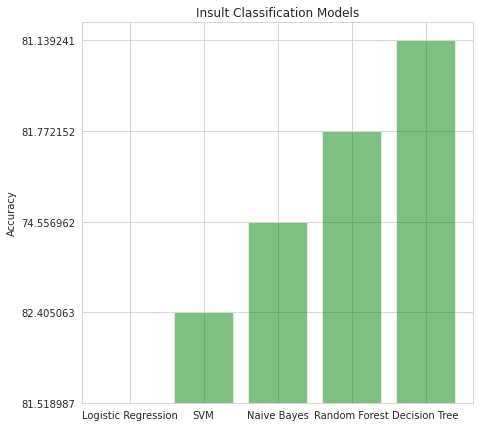

In [ ]:
linear_models = ('Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(linear_models)) 
plt.bar(y_pos, accuracy_normal, align='center', alpha=0.5, color='green')
plt.xticks(y_pos, linear_models)
plt.ylabel('Accuracy')
plt.title('Insult Classification Models')

Text(0.5, 1.0, 'Insult Classification Models')

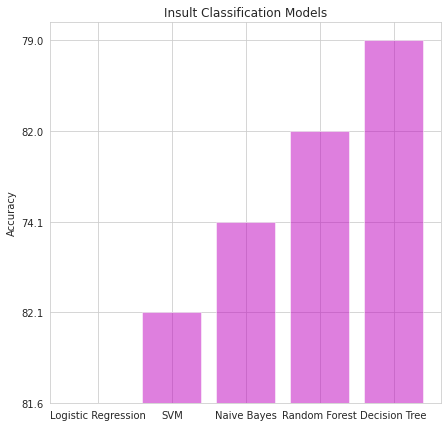

In [ ]:
linear_models = ('Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(linear_models)) 
plt.bar(y_pos, accuracy_cv, align='center', alpha=0.5, color='m')
plt.xticks(y_pos, linear_models)
plt.ylabel('Accuracy')
plt.title('Insult Classification Models')